# Unit 12 - Tales from the Crypto

---


In [1]:
!conda env list


# conda environments:
#
                         /Users/ameiramatariyeh/opt/anaconda3
                         /Users/ameiramatariyeh/opt/anaconda3/envs/algotrading
                         /Users/ameiramatariyeh/opt/anaconda3/envs/dev
                         /Users/ameiramatariyeh/opt/anaconda3/envs/mlenv
base                  *  /Users/ameiramatariyeh/opt/anaconda3/envs/nlpenv
                         /Users/ameiramatariyeh/opt/anaconda3/envs/pyvizenv
                         /Users/ameiramatariyeh/opt/anaconda3/envs/smallcapcryptosenv



## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [41]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ameiramatariyeh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [43]:
from newsapi import NewsApiClient

In [44]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [45]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="Bitcoin", language="en")
bitcoin_headlines["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Arielle Pardes',
 'title': 'Miami’s Bitcoin Conference Left a Trail of Harassment',
 'description': 'For some women, inappropriate conduct from other conference-goers continued to haunt them online.',
 'url': 'https://www.wired.com/story/bitcoin-2022-conference-harassment/',
 'urlToImage': 'https://media.wired.com/photos/627a89e3e37e715cb7d760d2/191:100/w_1280,c_limit/Bitcoin_Miami_Biz_GettyImages-1239817123.jpg',
 'publishedAt': '2022-05-10T16:59:46Z',
 'content': 'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]'}

In [46]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="Ethereum", language="en")

In [47]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [48]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935


In [49]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,-0.093390,0.059450,0.08045,0.860050
std,0.389782,0.062439,0.07613,0.104336
min,-0.859300,0.000000,0.00000,0.557000
25%,-0.366350,0.000000,0.05350,0.827000
50%,-0.190100,0.048000,0.06300,0.888000
75%,0.152575,0.085000,0.08425,0.930250
max,0.750600,0.202000,0.30000,0.964000


In [50]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.029180,0.045900,0.049450,0.904800
std,0.402413,0.059923,0.043592,0.052498
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.284450,0.000000,0.000000,0.858750
50%,-0.189700,0.000000,0.059000,0.925500
75%,0.288700,0.073000,0.069000,0.937000
max,0.690800,0.178000,0.178000,1.000000


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [51]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [52]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [53]:
# Complete the tokenizer function
def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
       
    return tokens    

In [54]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,2022-05-16,"As a kid, I remember when my father tried to u...",0.3818,0.114,0.052,0.833,"[kid, remember, father, tried, use, broom, han..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [55]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, ha, revealed, nfts, work, instagram, us..."
1,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, cryptocurrency, company..."
2,2022-05-04,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[bored, ape, yacht, club, creator, yuga, labs,..."
3,2022-04-26,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.000,0.858,"[april, reuters, ether, ha, promised, better, ..."
4,2022-04-26,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.000,0.935,"[ethereum, preparing, upgrade, thats, describe..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [56]:
from collections import Counter
from nltk import ngrams

In [57]:
# Generate the Bitcoin N-grams where N=2
bitcoin_tokenized = tokenizer(bitcoin_df.text.str.cat())
N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_tokenized, N))
print(dict(bitcoin_bigram_counts))

{('even', 'though'): 1, ('though', 'number'): 1, ('number', 'womenfocused'): 1, ('womenfocused', 'crypto'): 1, ('crypto', 'space'): 1, ('space', 'odeniran'): 1, ('odeniran', 'say'): 1, ('say', 'woman'): 1, ('woman', 'still'): 1, ('still', 'underrepresented'): 1, ('underrepresented', 'ive'): 1, ('ive', 'space'): 1, ('space', 'im'): 1, ('im', 'black'): 1, ('black', 'person'): 1, ('person', 'woman'): 1, ('woman', 'b'): 1, ('b', 'charsa'): 1, ('charsa', 'bitcoin'): 1, ('bitcoin', 'mining'): 1, ('mining', 'site'): 1, ('site', 'powered'): 1, ('powered', 'otherwise'): 1, ('otherwise', 'lost'): 1, ('lost', 'gas'): 1, ('gas', 'oil'): 1, ('oil', 'well'): 1, ('well', 'near'): 1, ('near', 'linden'): 1, ('linden', 'texas'): 1, ('texas', 'april'): 1, ('april', 'th'): 1, ('th', 'photo'): 1, ('photo', 'francois'): 1, ('francois', 'picardafp'): 1, ('picardafp', 'via'): 1, ('via', 'getty'): 1, ('getty', 'images'): 1, ('images', 'corporate'): 1, ('corporate', 'climate'): 1, ('climate', 'hype'): 1, ('hype

In [58]:
# Generate the Ethereum N-grams where N=2
ether_tokenized = tokenizer(ethereum_df.text.str.cat())
N=2
ether_bigram_counts = Counter(ngrams(ether_tokenized, N))
print(dict(ether_bigram_counts))

{('meta', 'ha'): 1, ('ha', 'revealed'): 1, ('revealed', 'nfts'): 1, ('nfts', 'work'): 1, ('work', 'instagram'): 1, ('instagram', 'usbased'): 1, ('usbased', 'test'): 1, ('test', 'show'): 1, ('show', 'youve'): 1, ('youve', 'bought'): 1, ('bought', 'created'): 1, ('created', 'free'): 1, ('free', 'connecting'): 1, ('connecting', 'instagram'): 1, ('instagram', 'account'): 1, ('account', 'compatible'): 1, ('compatible', 'digital'): 1, ('digital', 'walle'): 1, ('walle', 'charsa'): 1, ('charsa', 'multibillion'): 1, ('multibillion', 'dollar'): 1, ('dollar', 'cryptocurrency'): 1, ('cryptocurrency', 'company'): 1, ('company', 'ha'): 1, ('ha', 'apologised'): 1, ('apologised', 'user'): 1, ('user', 'sale'): 1, ('sale', 'metaverse'): 1, ('metaverse', 'land'): 1, ('land', 'sparked'): 1, ('sparked', 'frenzy'): 1, ('frenzy', 'temporarily'): 1, ('temporarily', 'brought'): 1, ('brought', 'ethereum'): 1, ('ethereum', 'cryptocurrencyyuga'): 1, ('cryptocurrencyyuga', 'labs'): 1, ('labs', 'comp'): 1, ('comp',

In [59]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top10= token_count(bitcoin_tokenized, 10)
bitcoin_top10

[('bitcoin', 13),
 ('cryptocurrency', 12),
 ('world', 7),
 ('ha', 5),
 ('week', 5),
 ('reuters', 5),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
ether_top10= token_count(ether_tokenized, 10)
ether_top10

[('cryptocurrency', 10),
 ('bitcoin', 8),
 ('ha', 7),
 ('world', 7),
 ('biggest', 5),
 ('reuters', 5),
 ('last', 5),
 ('ethereum', 4),
 ('nft', 4),
 ('week', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

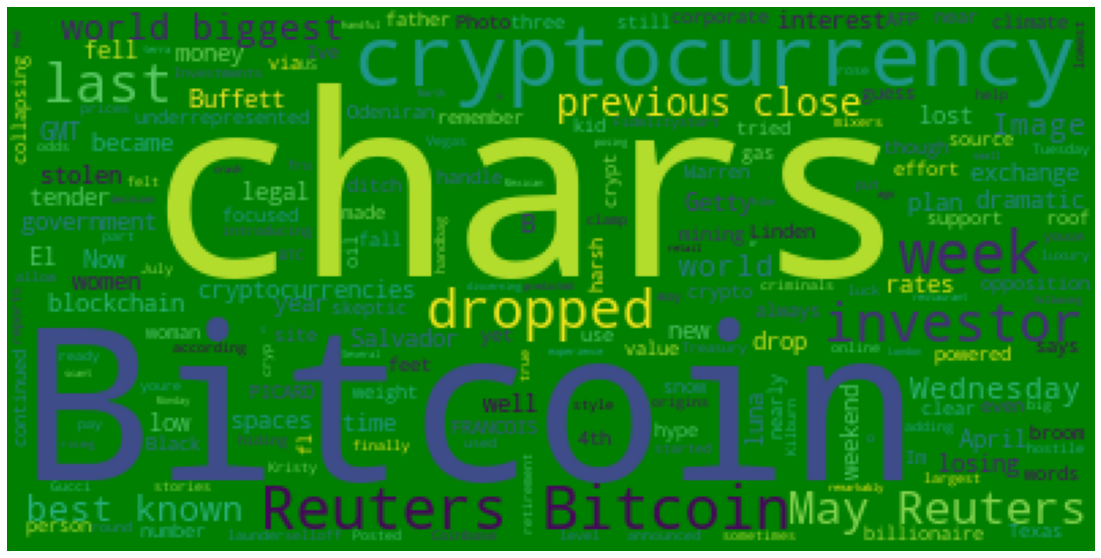

In [66]:
# Generate the Bitcoin word cloud
cloud_bit = WordCloud(background_color='green').generate(bitcoin_df.text.str.cat())
cloud_bit
plt.axis("off")
plt.imshow(cloud_bit);

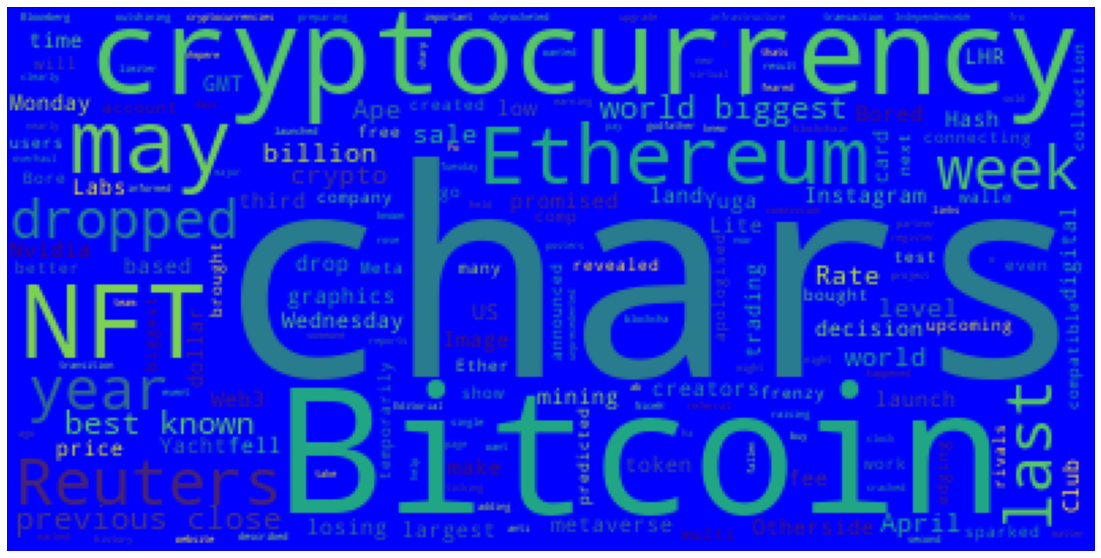

In [67]:
# Generate the Ethereum word cloud
cloud_eth = WordCloud(background_color='blue').generate(ethereum_df.text.str.cat())
cloud_eth
plt.axis("off")
plt.imshow(cloud_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [68]:
import spacy
from spacy import displacy

In [69]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [70]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [71]:
# Concatenate all of the Bitcoin text together
all_bitcoin_text = bitcoin_df.text.str.cat()
all_bitcoin_text

"Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars]A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]As a kid, I remember when my father tried to use a broom handle in a last ditch effort to support a roof that was collapsing from the weight of nearly three feet of snow. You can guess how well that … [+3390 chars]Image source, Getty Images\r\nThe value of Bitcoin continued to fall over the weekend as it dropped below $34,000 (£27,630), according to 

In [72]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(all_bitcoin_text)
bitcoin_doc
# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [73]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [74]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Buffett PERSON
the weekend DATE
Buffett PERSON
nearly three feet QUANTITY
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
Mexican NORP
North London GPE
a few weeks ago DATE
10 CARDINAL
Reuters ORG
+4315 CA

---

### Ethereum NER

In [75]:
# Concatenate all of the Ethereum text together
all_eth_text = ethereum_df.text.str.cat()
all_eth_text

'Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many to be the biggest NFT launch ever. Otherside is an upcoming Bore… [+6669 chars]April 26 (Reuters) - Ether has promised to do better. It has promised to go to the next level, edging out crypto rivals and even outshining the godfather, bitcoin. But the clock\'s ticking.\r\nThe No.2 … [+4092 chars]Ethereum is preparing for an upgrade thats been described as the single most important event in crypto history.\r\nThe transition would o

In [76]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)
eth_doc

# Add a title to the document
eth_doc.user_data["Title"] = "Ethereum NER"

In [77]:
# Render the visualization
displacy.render(eth_doc, style = 'ent')

In [78]:
# List all Entities
for i in eth_doc.ents:
    print(i.text, i.label_)

Meta ORG
Instagram ORG
US GPE
Instagram ORG
Ethereum ORG
Yuga Labs PERSON
Bored Ape Yacht Club PERSON
Yuga Labs PERSON
Otherside ORG
April 30 DATE
NFT ORG
chars]April 26 DATE
Reuters ORG
No.2 DATE
second ORDINAL
the "Bored Apes Yacht Club LAW
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
chars]40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
Nvidia PERSON
Ethereum ORG
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
9 CARDINAL
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
NFT ORG
Ethereum ORG
Last week DATE
chars]9 PERSON
8 CARDINAL
Nvidia ORG
LHR ORG
Lite Ha

---